# Inspect ImageNet2012 torchvision Dataset

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import tv_tensors
from torchvision import transforms
from torchvision.transforms import v2  # TODO Verify: not used, v2 is somehow slower in this case

## Inspect Content

Ref for data preparation: https://github.com/pytorch/examples/blob/main/imagenet/extract_ILSVRC.sh

In [2]:
dataset_train = torchvision.datasets.ImageNet(root='../data/imagenet2012/', split='train', transform=torchvision.transforms.ToTensor())
dataset_val = torchvision.datasets.ImageNet(root='../data/imagenet2012/', split='val', transform=torchvision.transforms.ToTensor())

In [3]:
print(f"Len of train dataset: {len(dataset_train)}")
print(f"Len of val dataset: {len(dataset_val)}")
print(f"Number of classes: {len(dataset_train.classes)}")
print(f"\nFirst 10th classes")
for i in range(10):
    print(f"Class {i}: {dataset_train.classes[i]}, ID={dataset_train.class_to_idx[dataset_train.classes[i][0]]}")
print(f"\nSample")
x, y = dataset_train[2]
print(f"Image: {x} ({type(x)=}), hw={x.size}")  # PIL Image with non-fixed size
print(f"Label: {y} ({type(y)=})")

Len of train dataset: 1281167
Len of val dataset: 50000
Number of classes: 1000

First 10th classes
Class 0: ('tench', 'Tinca tinca'), ID=0
Class 1: ('goldfish', 'Carassius auratus'), ID=1
Class 2: ('great white shark', 'white shark', 'man-eater', 'man-eating shark', 'Carcharodon carcharias'), ID=2
Class 3: ('tiger shark', 'Galeocerdo cuvieri'), ID=3
Class 4: ('hammerhead', 'hammerhead shark'), ID=4
Class 5: ('electric ray', 'crampfish', 'numbfish', 'torpedo'), ID=5
Class 6: ('stingray',), ID=6
Class 7: ('cock',), ID=7
Class 8: ('hen',), ID=8
Class 9: ('ostrich', 'Struthio camelus'), ID=9

Sample
Image: tensor([[[0.1216, 0.1412, 0.1373,  ..., 0.2549, 0.3020, 0.2941],
         [0.1373, 0.1529, 0.1529,  ..., 0.2471, 0.2353, 0.2510],
         [0.1529, 0.1529, 0.1451,  ..., 0.1882, 0.2392, 0.2196],
         ...,
         [0.3137, 0.2706, 0.2549,  ..., 0.4196, 0.3020, 0.1294],
         [0.3176, 0.2902, 0.2667,  ..., 0.4157, 0.2980, 0.1294],
         [0.2902, 0.3137, 0.2941,  ..., 0.4039, 0.

In [4]:
torch.manual_seed(1337)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=1, shuffle=True)
print(f"Example imgs batch: {next(iter(dataloader_train))[0].size()}")
print(f"Example labels batch: {next(iter(dataloader_train))[1].size()}")

Example imgs batch: torch.Size([1, 3, 375, 500])
Example labels batch: torch.Size([1])


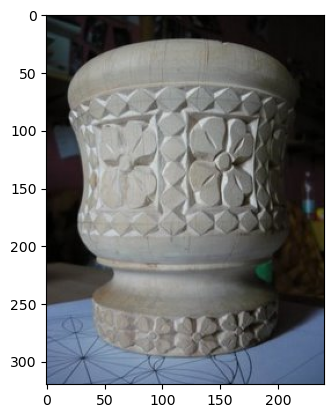

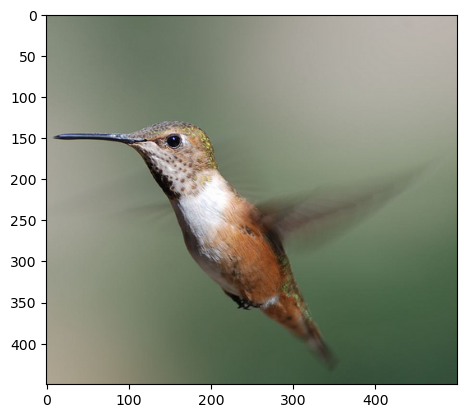

In [5]:
# data get shuffled every time iterator is created

dataiter_train1 = iter(dataloader_train)
img_train1, label_train1 = next(dataiter_train1)
plt.imshow(img_train1[0].permute(1, 2, 0))
plt.show()

dataiter_train2 = iter(dataloader_train)
img_train2, label_train2 = next(dataiter_train2)
plt.imshow(img_train2[0].permute(1, 2, 0))
plt.show()

## Inspect Transforms

In [4]:
dataset_name = 'imagenet2012'
img_h = 256
img_w = 256
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)

brightness = 0.75
contrast = 0.75
saturation = 0.75
hue = 0.5
degrees = 7
scale_min = 0.5
scale_max = 2.0
ratio_min = 3.0 / 4.0
ratio_max = 4.0 / 3.0
flip_p = 0.5

# # No augmentation
# brightness = 0.0
# contrast = 0.0
# saturation = 0.0
# hue = 0.0
# degrees = 0.0
# scale_min = 1.0
# scale_max = 1.0
# ratio_min = 1.0
# ratio_max = 1.0
# flip_p = 0.0

In [5]:
def show_img(img):
    plt.imshow(img.permute(1, 2, 0))
    plt.title(f"Image, shape={img.size()}")
    plt.show()

### No transforms

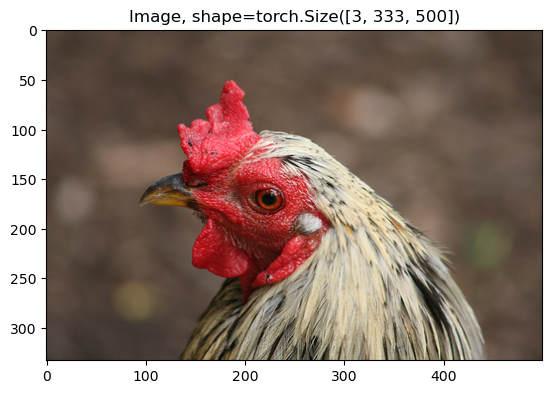

Label: 7


In [5]:
data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train',
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
show_img(dataset_train[9999][0])
print("Label:", dataset_train[9999][1])

### (Archived) Common ImageNet validation transforms (center crop)

For simple-aug and no-aug only

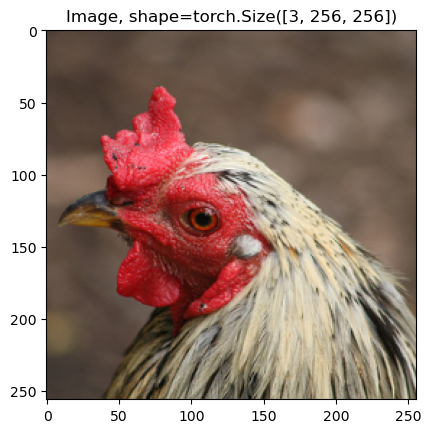

In [ ]:
data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train', # split='val'
    transform=v2.Compose([
        v2.ToImage(),
        v2.Resize(size=max(img_h, img_w)),
        v2.CenterCrop(size=(img_h, img_w)),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ])
)
show_img(dataset_train[9999][0])

### Validation transforms (pad short edge)

For training augmentation with zoom out

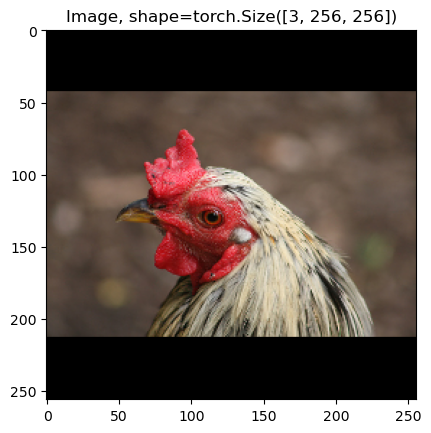

In [40]:
data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train', # split='val'
    transform=v2.Compose([
        v2.ToImage(),
        v2.Resize(size=max(img_h, img_w) - 1, max_size=max(img_h, img_w)),  # max_size must > size
        v2.CenterCrop(size=(img_h, img_w)),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ])
)
show_img(dataset_train[9999][0])

### (Archived) Common ImageNet training transform (simple-aug)

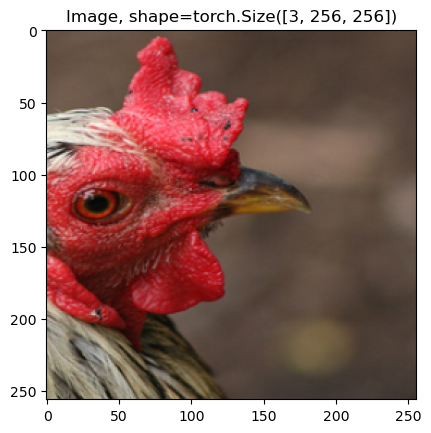

In [764]:
data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train',
    transform=v2.Compose([
        v2.ToImage(),
        v2.RandomResizedCrop(size=(img_h, img_w), scale=(0.08, 1.0),
                             ratio=((3.0 / 4.0), (4.0 / 3.0)), antialias=True),
        v2.RandomHorizontalFlip(p=flip_p),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ])
)
show_img(dataset_train[9999][0])

### Training transform (type0-aug)

Cons:
- Only zoom in the pad-short-edge val transform
- No rotation

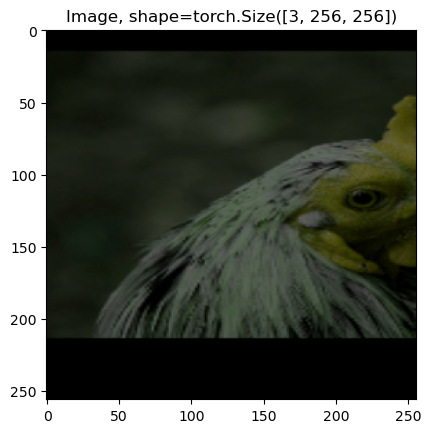

In [39]:
data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train',
    transform=v2.Compose([
        v2.ToImage(),
        v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
        v2.Resize(size=max(img_h, img_w) - 1, max_size=max(img_h, img_w)),  # max_size must > size
        v2.CenterCrop(size=(img_h, img_w)),
        v2.RandomResizedCrop(size=(img_h, img_w), scale=(scale_min ** 2, 1.0),
                             ratio=(scale_min, scale_max), antialias=True),
        v2.RandomHorizontalFlip(p=flip_p),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ])
)
show_img(dataset_train[9999][0])

### Training transform (type1-aug)

Cons:
- Padded edges must have same aspect ratio as the target image size.
- Zoom out scale is for fixed target image size, not the original image.

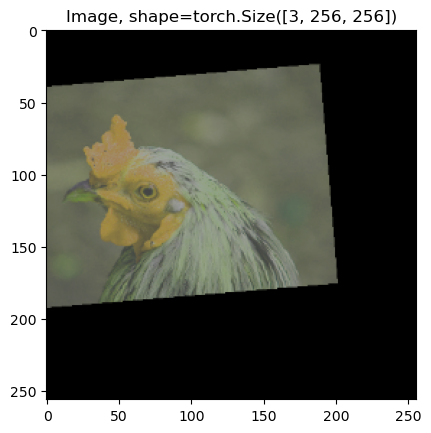

In [762]:
data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train',
    transform=v2.Compose([
        v2.ToImage(),
        v2.Resize(size=max(img_h, img_w), antialias=True),
        v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
        v2.Pad(padding=(int(img_h * (scale_max - 1) / 2), int(img_w * (scale_max - 1) / 2)), fill=0, padding_mode='constant'),
        v2.RandomRotation(degrees=degrees),
        v2.RandomResizedCrop(size=(img_h, img_w), scale=(scale_min ** 2, 1.0), ratio=(ratio_min, ratio_max)),
        v2.RandomHorizontalFlip(p=flip_p),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ])
)
show_img(dataset_train[9999][0])

### (To Test) Custom training transform (type2-aug)

Cons:
- Padded edges must have same aspect ratio as the original image.
- Not v2 compatible, so cannot be used for object detection.

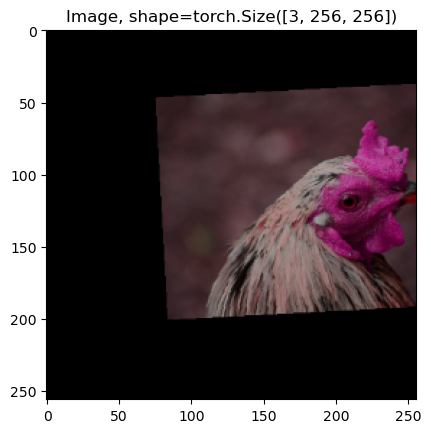

In [773]:
from typing import Any, Callable, Dict, List, Literal, Optional, Sequence, Tuple, Type, Union
import torch.nn as nn
from torchvision.transforms.v2 import functional as F
from torchvision.transforms.v2.functional._utils import _FillType

class ZoomOut(nn.Module):
    def __init__(self,
                 scale: float,
                 fill: Union[_FillType, Dict[Union[Type, str], _FillType]] = 0,
                 padding_mode: Literal["constant", "edge", "reflect", "symmetric"] = "constant",) -> None:
        super().__init__()
        self.scale = scale
        self.fill = fill
        self.padding_mode = padding_mode

    def forward(self, img: torch.Tensor) -> torch.Tensor:
        orig_h, orig_w = img.shape[-2:]
        new_h, new_w = int(orig_h * self.scale), int(orig_w * self.scale)
        padding = ((new_w - orig_w) // 2, (new_h - orig_h) // 2)
        return F.pad(img, padding, self.fill, self.padding_mode)


data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train',
    transform=v2.Compose([
        v2.ToImage(),
        v2.Resize(size=max(img_h, img_w), antialias=True),
        v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
        ZoomOut(scale=scale_max, fill=0, padding_mode='constant'),
        v2.RandomRotation(degrees=degrees),
        v2.RandomResizedCrop(size=(img_h, img_w), scale=(scale_min ** 2, 1.0), ratio=(ratio_min, ratio_max)),
        v2.RandomHorizontalFlip(p=flip_p),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ])
)
show_img(dataset_train[9999][0])

### (To Test) Training transform (type3-aug)

Cons:
- No random aspect ratio 
- More zoom in, less zoom out
- Scale range might be a bit large
- Cannot achieve no-aug

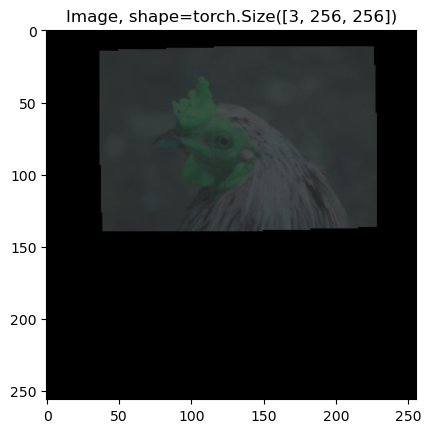

In [782]:
data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train',
    transform=v2.Compose([
        v2.ToImage(),
        v2.RandomResize(min_size=int(min(img_h, img_w) / scale_max),
                        max_size=int(max(img_h, img_w) / scale_min),
                        antialias=True),
        v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
        v2.RandomRotation(degrees=degrees),
        v2.RandomCrop(size=(img_h, img_w), pad_if_needed=True, fill=0, padding_mode='constant'),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ])
)
show_img(dataset_train[9999][0])

### (To Test) Custom training transform (type4-aug)

Cons:
- Scale range might be a bit large
- Cannot achieve no-aug

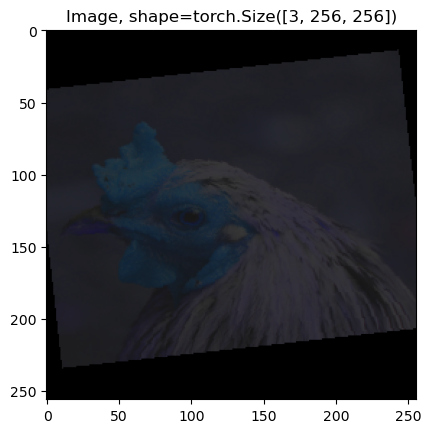

In [41]:
import math
from typing import Any, Callable, Dict, List, Literal, Optional, Sequence, Tuple, Type, Union
from torchvision.transforms.v2 import functional as F, InterpolationMode

class RandomResize(v2.RandomResize):
    def __init__(
        self,
        min_size: int,  # min_size of the longer side
        max_size: int,  # max_size of the longer side
        ratio: Tuple[float, float],
        interpolation: Union[InterpolationMode, int] = InterpolationMode.BILINEAR,
        antialias: Optional[bool] = True,
    ) -> None:
        super().__init__(min_size, max_size, interpolation, antialias)
        self.min_size = min_size
        if max_size == min_size:
            self.max_size = min_size + 1  # randint is [min, max)
        else:
            self.max_size = max_size
        self.ratio = ratio
        self.interpolation = interpolation
        self.antialias = antialias
        self._log_ratio = torch.log(torch.tensor(self.ratio))

    def _get_params(self, flat_inputs: List[Any]) -> Dict[str, Any]:
        long_size = int(torch.randint(self.min_size, self.max_size, ()))
        aspect_ratio = torch.exp(
            torch.empty(1).uniform_(
                self._log_ratio[0],
                self._log_ratio[1],
            )
        ).item()
        aspect_factor = math.sqrt(aspect_ratio)
        orig_h, orig_w = v2._utils.query_size(flat_inputs)
        if orig_h < orig_w:
            size = (int(long_size / orig_w * orig_h / aspect_factor), int(long_size * aspect_factor))
        else:
            size = (int(long_size / aspect_factor), int(long_size / orig_h * orig_w * aspect_factor))
        return dict(size=size)


data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train',
    transform=v2.Compose([
        v2.ToImage(),
        v2.RandomChoice([
            v2.Compose([
                RandomResize(min_size=int(min(img_h, img_w) / scale_max),
                             max_size=int(max(img_h, img_w) / scale_min),
                             ratio=(ratio_min, ratio_max),
                             antialias=True),
                v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
                v2.RandomCrop(size=(img_h, img_w), pad_if_needed=True, fill=0, padding_mode='constant'),
                v2.RandomRotation(degrees=degrees),
            ]),
            v2.Compose([
                v2.Resize(size=max(img_h, img_w) - 1, max_size=max(img_h, img_w)),  # max_size must > size
                v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
                v2.CenterCrop(size=(img_h, img_w)),
            ])
        ], p=[0.9, 0.1]),
        v2.RandomHorizontalFlip(p=flip_p),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ])
)
show_img(dataset_train[9999][0])

## Inspect FakeData

In [17]:
n_data = 10
img_h = 256
img_w = 256
n_class = 1000
dataset_fake = torchvision.datasets.FakeData(size=n_data,
                                             image_size=(3, img_h, img_w),
                                             num_classes=n_class,
                                             transform=v2.Compose([v2.ToImage(),
                                                                   v2.ToDtype(torch.float32, scale=True),]))

example_img.shape=torch.Size([3, 256, 256]), example_label=445
example_img.dtype=torch.float32, example_img.min()=tensor(0.), example_img.max()=tensor(1.)


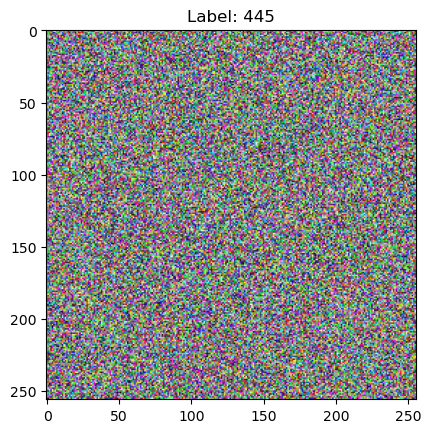

In [18]:
example_img, example_label = dataset_fake[0]
print(f"{example_img.shape=}, {example_label=}")
print(f"{example_img.dtype=}, {example_img.min()=}, {example_img.max()=}")
plt.imshow(example_img.permute(1, 2, 0))
plt.title(f"Label: {example_label}")
plt.show()

In [11]:
dataloader_fake = torch.utils.data.DataLoader(dataset_fake, batch_size=2, shuffle=True)
example_imgs, example_labels = next(iter(dataloader_fake))
print(f"{example_imgs.shape=}, {example_labels.shape=}")

example_imgs.shape=torch.Size([2, 3, 256, 256]), example_labels.shape=torch.Size([2])


In [22]:
dataset_fake_new = torchvision.datasets.FakeData(size=n_data,
                                                 image_size=(3, img_h, img_w),
                                                 num_classes=n_class,
                                                 transform=v2.Compose([v2.ToImage(),
                                                                       v2.ToDtype(torch.float32, scale=True),]))
example_img_new, example_label_new = dataset_fake_new[0]

if (example_img_new == example_img).all() and (example_label_new == example_label):
    print("Fake data is constant")
else:
    print("Fake data is changed randomly")

Fake data is constant


## Inspect Input-Independent Transform using Lambda

In [2]:
dataset_name = 'imagenet2012'
img_h = 256
img_w = 256
imgs_mean = (-0.5, -0.5, -0.5)
imgs_std = (1.0, 1.0, 1.0)

data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train', # split='val'
    transform=v2.Compose([
        v2.Lambda(lambda img: torch.zeros((3, img_h, img_w), dtype=torch.float32)),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ])
)
print("Blank img shape:", dataset_train[9999][0].shape, "max:", dataset_train[9999][0].max(), "min:", dataset_train[9999][0].min())
print("Label:", dataset_train[9999][1])

Blank img shape: torch.Size([3, 256, 256]) max: tensor(0.5000) min: tensor(0.5000)
Label: 7
